# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. It looks like this paper is about a framework or general approach to getting raw (and, therefore, probably messy) data into an organized format, so that it's easier to work with, get ready for analysis, and analyze.
2. The tidy data standard is intended to help those who work with data more easily explore and run initial analyses on raw data.
3. The statement, "Like families, tidy datasets are all alike, but every messy dataset is messy in its own way," refers to how organized datasets are similar in that they facilitate the investigation of said data, but messy datasets are different from one another because due to the variety of contexts in which data are created, they are likely disorganized in unique ways. The second statement, "For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," refers to how when given an experimental results or a dataset, it's easy (in that context) to identify (via intuition) what would count as observations and what would count as variables. However, trying to come up with an objective, abstract, or general definition for observations and variables is more difficult, as when there's no context to work with, or when an observation/variable is standalone, knowing whether they count as an observation or variable is more elusive.
4. Wickham describes an observation as a unit or an instance of an entity/group. Variables, on the other hand, are distinct attributes of that unit, shared across other units in the group. Values are numbers or text that are assigned to or used to describe a particular attribute of a particular unit.
5. For data to be tidy, it must have these three properties: (1) Each variable forms a column. (2) Each observation forms a row. (3) Each type of observational unit forms a row.
6. The five most common problems with messy datasets are: (1) Column headers are values, not variable names. (2) Multiple values are stored in one column. (3) Variables are stored in both rows and columns. (4) Multiple types of observational units are stored in the same table. (5) A single observational unit is stored in multiple tables. The data in Table 4 are messy because column headers are values, not variable names. The values that are being used as headers are income ranges. Melting a dataset means taking values that are currently being used as headers and using them to create new unique rows of data--each row of data having a column for one of those values.
7. Table 11 is messy because column headers are values (the days of the month) and Table 12 is molten and tidy because the time-related variable values have been put into a singular column and the tmin/tmax variables given their own columns in which their respective values can go into.
8. For tidy tools or tools that are easy to work with but still effective to work, they need some kind of expectation as to what the data that they'll receive will look like, so that expectation is something to keep in mind while tidying data. At the same time, one needs to tidy data up before they send it through a tidy tool. This is the chicken-and-egg problem with focusing on tidy data. To resolve this issue, Wickham hopes that approaches to handling different kinds of data (from tidying to cleaning to analyzing) will become more standardized and robust.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/airbnb_hw.csv')
df.head(1)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN


In [5]:
# Check for missing values
df[df['Price'].isna()]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating


In [4]:
# Get all unique values
df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [14]:
# Get rid of the commas
df['Price'] = df['Price'].str.replace(',', '')

# Get all unique values (again)
df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '226'

In [16]:
# Coerce values
df['Price'] = pd.to_numeric(df['Price'])

# Get all unique values (again)
df['Price'].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

The above code checks the "Price" column for null values, gets rid of the commas in the values, and coerces the string values into ints. Turns out, there are no null values in this column.

In [19]:
df = pd.read_csv('./data/sharks.csv', low_memory=False)
df.head(1)

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['Type']

0       Unprovoked
1         Provoked
2       Unprovoked
3       Unprovoked
4       Unprovoked
           ...    
6457    Unprovoked
6458    Unprovoked
6459    Unprovoked
6460    Unprovoked
6461    Unprovoked
Name: Type, Length: 6462, dtype: object

In [21]:
df['Type'].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [22]:
df[df['Type'].isna()]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
239,239,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoali’i,Fishing,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,537,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087,4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5025,5025,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5864,5864,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
len(df)

6462

It looks like one of the rows for which the "Type" column value is null contains null values for all columns. This can be discarded. I think that the other rows for which the "Type" column value is null could probably be safely discarded as well. As you can see, there are only 5 of these kinds of rows out of a total 6462 rows.

In [24]:
df = df[~df['Type'].isna()]
len(df)

6457

In [25]:
len(df[df['Type']=='Boatomg'])

1

In [26]:
len(df[df['Type']=='Boating'])

92

It looks like there's only one row for which the "Type" column value is "Boatomg". I feel more or less confident that this value is meant to be "Boating". Thus, I will change that row's "Type" column value to "Boating".

In [27]:
df.loc[df['Type']=='Boatomg', :] = 'Boating'

In [28]:
len(df[df['Type']=='Boatomg'])

0

At this point, I think that I've done all the cleaning that I can reasonably do with the knowledge that I have. To do a better clean, I might inquire as to what certain "Type" column values mean (e.g., "Invalid") to see if that is indeed a valid value or if it can be transformed into something else. Same with "Boat". That input could indeed be distinct from "Boating," in which case, it would be better to leave as is than transform into "Boating".

In [71]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [72]:
df.head(1)

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...


In [73]:
df['WhetherDefendantWasReleasedPretrial']

0        9
1        0
2        0
3        0
4        1
        ..
22981    1
22982    1
22983    1
22984    1
22985    1
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: int64

In [74]:
df['WhetherDefendantWasReleasedPretrial'].unique()

array([9, 0, 1], dtype=int64)

In [75]:
df[df['WhetherDefendantWasReleasedPretrial'].isna()]

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants


The given dataset does not appear to have any missing values for the column "WhetherDefendantWasReleasedPretrial".

In [76]:
df['ImposedSentenceAllChargeInContactEvent']

0                        
1                      60
2                      12
3        .985626283367556
4                        
               ...       
22981                    
22982                    
22983                    
22984                    
22985                    
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object

In [77]:
df['ImposedSentenceAllChargeInContactEvent'].unique()

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [78]:
df[df['ImposedSentenceAllChargeInContactEvent']==' ']

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
11,CDI00050,14,M,B,1992,25,2,25,4,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
12,CDI00055,15,F,W,1982,35,3,35,4,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
15,CDI00089,18,F,W,1979,38,4,38,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22981,SJA00343,22839,M,B,1976,41,4,41,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22982,SJA00344,,F,W,,,9,,99,99,...,,,,999,999,,3,,9,Defendant could not be classified or tracked d...
22983,SJA00345,22841,M,B,1981,36,4,36,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22984,SJA00346,22842,F,B,1993,24,2,24,5,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [79]:
df['SentenceTypeAllChargesAtConvictionInContactEvent']

0        9
1        0
2        1
3        1
4        4
        ..
22981    4
22982    9
22983    4
22984    4
22985    4
Name: SentenceTypeAllChargesAtConvictionInContactEvent, Length: 22986, dtype: int64

In [80]:
df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()

array([9, 0, 1, 4, 2], dtype=int64)

In [81]:
pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'], df['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
,0,0,0,8779,274
.0328542094455852,0,6,0,0,0
.0657084188911704,3,21,0,0,0
.0985626283367557,2,6,0,0,0
.131416837782341,4,10,0,0,0
...,...,...,...,...,...
98,0,0,1,0,0
98.95687885,0,0,1,0,0
99,0,1,0,0,0


In [82]:
pd.crosstab(df[df['ImposedSentenceAllChargeInContactEvent']==' ']['ImposedSentenceAllChargeInContactEvent'], df['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,4,9
ImposedSentenceAllChargeInContactEvent,,
,8779,274


The above code emphasizes what's shown by the first crosstab - "empty" first row is really for the space.

In [83]:
df.loc[(df['ImposedSentenceAllChargeInContactEvent'] == ' ') & (df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4), 'ImposedSentenceAllChargeInContactEvent'] = 0

In [84]:
import numpy as np

In [85]:
df.loc[(df['ImposedSentenceAllChargeInContactEvent'] == ' ') & (df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9), 'ImposedSentenceAllChargeInContactEvent'] = np.nan

In [86]:
pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'], df['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4
ImposedSentenceAllChargeInContactEvent,,,,
0,0,0,0,8779
.0328542094455852,0,6,0,0
.0657084188911704,3,21,0,0
.0985626283367557,2,6,0,0
.131416837782341,4,10,0,0
...,...,...,...,...
98,0,0,1,0
98.95687885,0,0,1,0
99,0,1,0,0


In [87]:
df['ImposedSentenceAllChargeInContactEvent'].unique()

array([nan, '60', '12', '.985626283367556', 0, '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926

Replaced the 'ImposedSentenceAllChargeInContactEvent' column value for rows that had a space for 'ImposedSentenceAllChargeInContactEvent' and a 4 for 'SentenceTypeAllChargesAtConvictionInContactEvent' with 0 (meaning no bond posted). For the same, but with a 9 for 'SentenceTypeAllChargesAtConvictionInContactEvent', replaced with NaN (meaning that there really was insufficient information).

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [7]:
# Q1:
df = pd.read_csv('./data/college_completion.csv')
df.head(1)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0


In [8]:
# Q2:
df.shape

(3798, 63)

Observations: Colleges/universities

In [9]:
# Q3:
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


In [10]:
465 + 68 + 926

1459

In [11]:
527 + 1180 + 632

2339

In [12]:
2339 / 1459

1.6031528444139822

Patterns that I see:
- W/ respect to 2-year colleges - most are public, least are private not-for-profit
- W/ respect to 4-year universities - most are private not-for-profit, least are private for-profit
- No. of 4-year universities > No. of 2-year colleges (by a factor of about 1.6)

<Axes: ylabel='Frequency'>

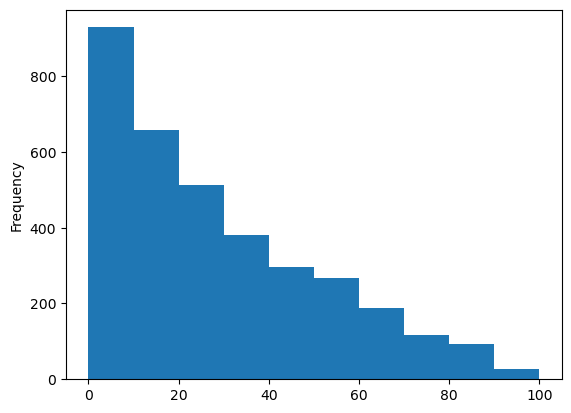

In [13]:
# Q4:
df['grad_100_value'].plot.hist()

Low graduation rates (< 50%) more common than high graduation rates (>= 50%)

Definition of "low" and "high" graduation rates may be different - is probably more appropriate to determine those based off of a measure of central tendency of grad_100_value. (B/c basing "low" and "high" off of a typical value gives them more meaning)

<Axes: ylabel='Density'>

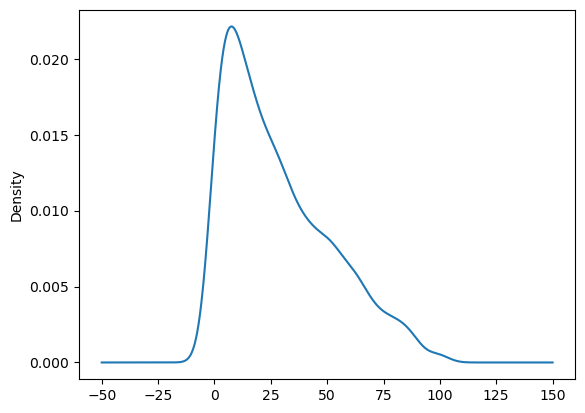

In [14]:
df['grad_100_value'].plot.kde()

<Axes: >

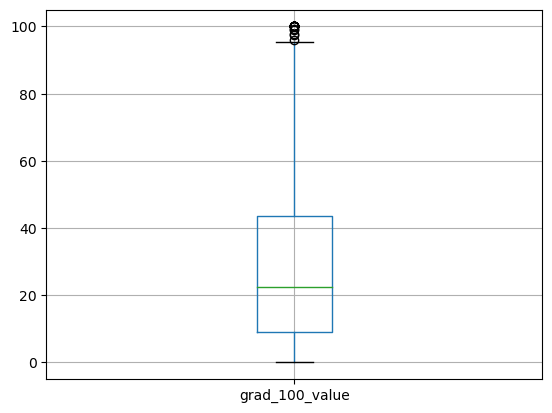

In [17]:
df.boxplot('grad_100_value')

In [18]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

Mean graduation rate: 28%

Median graduation rate: 23%

Actually, the typical graduation rate isn't very high.

<Axes: xlabel='grad_100_value', ylabel='Density'>

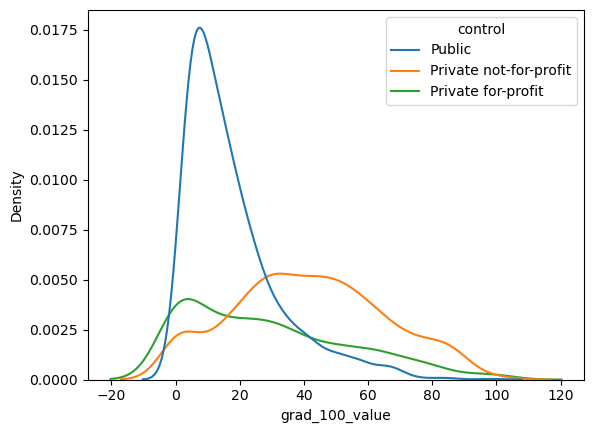

In [33]:
# Q5:
import seaborn as sns
sns.kdeplot(data=df, x='grad_100_value', hue='control')

High probability (relative to other types of institutions) that public institutions will have a graduation rate of about 15%

Graduation rates for other types of institutions more spread out

Private not-for-profit institutions seem to have the best graduation rate in general

<Axes: xlabel='grad_100_value', ylabel='Density'>

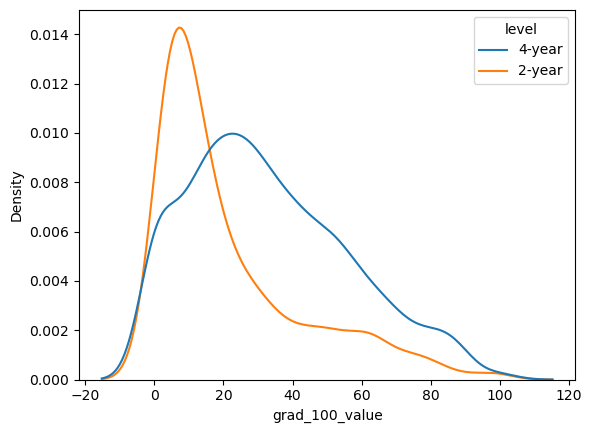

In [35]:
sns.kdeplot(data=df, x='grad_100_value', hue='level')

4-year institutions have the higher graduation rate when compared to 2-year institutions

In [24]:
df.groupby(['grad_100_value', 'control']).describe()

index                            \
                                       count         mean          std   
grad_100_value control                                                   
0.0            Private for-profit      140.0  2741.607143  1122.808879   
               Private not-for-profit   69.0  2178.797101  1056.236014   
               Public                   10.0  2769.100000   929.694508   
0.3            Private for-profit        2.0  3362.000000   113.137085   
               Public                    1.0  2202.000000          NaN   
...                                      ...          ...          ...   
97.8           Public                    1.0  3332.000000          NaN   
99.0           Private for-profit        1.0  3323.000000          NaN   
99.2           Private for-profit        1.0  3087.000000          NaN   
100.0          Private for-profit        7.0  2527.857143  1206.558250   
               Private not-for-profit    6.0  1853.500000  1147.947516   

                                                                         \
                                          min      25%     50%      75%   
grad_100_value control                                                    
0.0            Private for-profit        20.0  2312.50  3309.0  3516.25   
               Private not-for-profit     2.0  1620.00  1883.0  3210.00   
               Public                  1113.0  2014.25  3171.0  3298.25   
0.3            Private for-profit      3282.0  3322.00  3362.0  3402.00   
               Public                  2202.0  2202.00  2202.0  2202.00   
...                                       ...      ...     ...      ...   
97.8           Public                  3332.0  3332.00  3332.0  3332.00   
99.0           Private for-profit      3323.0  3323.00  3323.0  3323.00   
99.2           Private for-profit      3087.0  3087.00  3087.0  3087.00   
100.0          Private for-profit       331.0  2173.50  3099.0  3241.50   
               Private not-for-profit   208.0  1314.00  1748.0  2526.25   

                                              unitid                 ...  \
                                          max  count           mean  ...   
grad_100_value control                                               ...   
0.0            Private for-profit      3786.0  140.0  334680.492857  ...   
               Private not-for-profit  3793.0   69.0  264235.536232  ...   
               Public                  3792.0   10.0  340933.800000  ...   
0.3            Private for-profit      3442.0    2.0  429978.500000  ...   
               Public                  2202.0    1.0  207564.000000  ...   
...                                       ...    ...            ...  ...   
97.8           Public                  3332.0    1.0  430795.000000  ...   
99.0           Private for-profit      3323.0    1.0  430157.000000  ...   
99.2           Private for-profit      3087.0    1.0  365204.000000  ...   
100.0          Private for-profit      3435.0    7.0  307234.428571  ...   
               Private not-for-profit  3462.0    6.0  222592.666667  ...   

                                      carnegie_ct        cohort_size  \
                                              75%    max       count   
grad_100_value control                                                 
0.0            Private for-profit          517.00  517.0       140.0   
               Private not-for-profit      106.00  386.0        69.0   
               Public                      109.75  124.0        10.0   
0.3            Private for-profit          300.00  386.0         2.0   
               Public                       34.00   34.0         1.0   
...                                           ...    ...         ...   
97.8           Public                      111.00  111.0         1.0   
99.0           Private for-profit          517.00  517.0         1.0   
99.2           Private for-profit          517.00  517.0         1.0   
100.0          Private

Took awhile to load.

Also not what I wanted.

Grouped data by grad_100_value (some string/float - of which are many) and ALSO grouped each of those groups by institution type (control). Instead, want to group data by institution type and then see the statistical descriptions for each of those groups. So, group data by institution type. Get grad_100_value column of that data group. Then, apply describe function.

In [40]:
df.groupby(['level'])['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


Like shown by KDE plot - by mean and median, 4-year institutions have better graduation rates

In [41]:
df.groupby(['control'])['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


Based off of the typical values/measures of central tendency (mean and median), it looks like private not-for-profit institutions have the best graduation rates.

In [44]:
df.groupby(['level', 'control'])['grad_100_value'].describe()

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [29]:
# Q6:
df['levelXcontrol'] = df['level']+', '+df['control'] # (e.g., 4-year, private not-for-profit)

<Axes: xlabel='grad_100_value', ylabel='Density'>

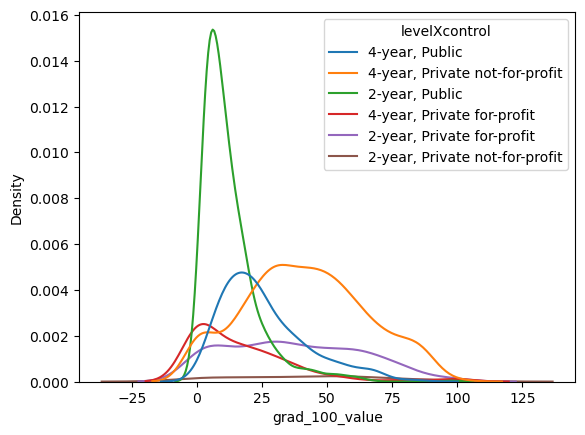

In [36]:
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')

4-year, private not-for-profit institutions appear to have higher graduation rates in general when compared to other types of insitutions!

<Axes: xlabel='aid_value', ylabel='Density'>

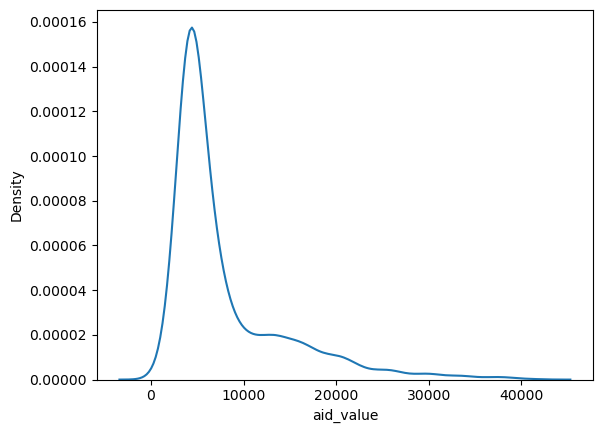

In [37]:
# Q7:
sns.kdeplot(data=df, x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

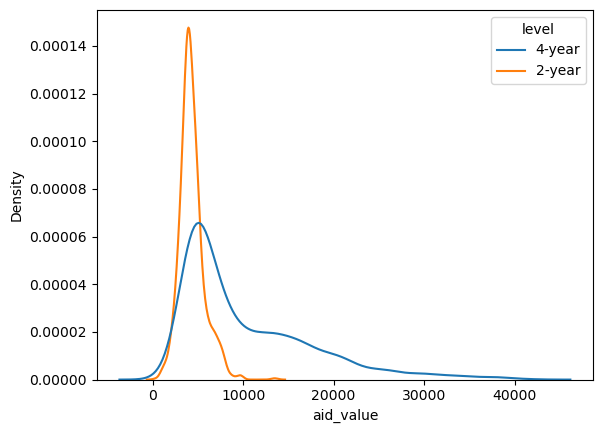

In [38]:
sns.kdeplot(data=df, x='aid_value', hue='level')

<Axes: xlabel='aid_value', ylabel='Density'>

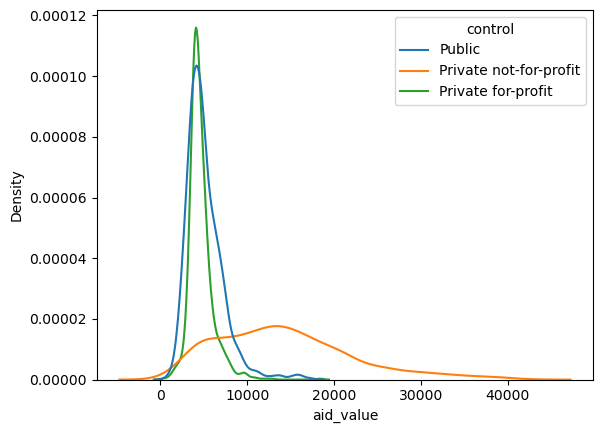

In [39]:
sns.kdeplot(data=df, x='aid_value', hue='control')

In [42]:
df.groupby(['level'])['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


4-year institutions also give out more aid in general than 2-year institutions.

In [43]:
df.groupby(['control'])['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


Private not-for-profit institutions give out better aid than other types of institutions.

In [45]:
df.groupby(['level', 'control'])['aid_value'].describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

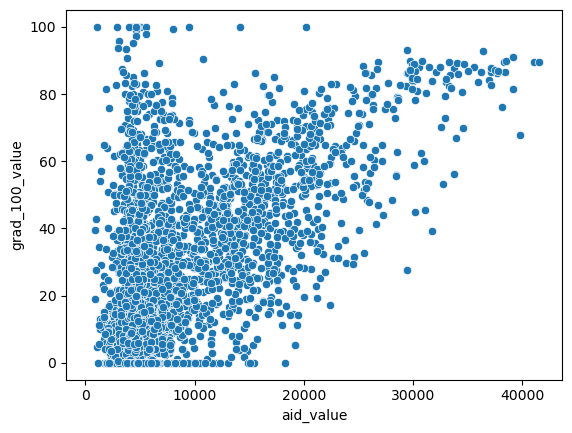

In [48]:
# Q8:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')

Seems like there may be two main patterns/trends - a vertical line at low aid values and a diagonal line going from the bottom-left corner to the upper-right corner. At low aid levels, you can have all kinds of graduation rates? As you increase in aid levels, you see an increase in graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

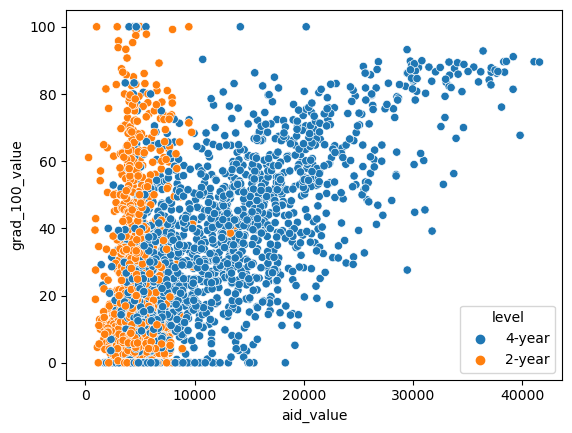

In [50]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')

2-year institutions don't give that much aid and that aid does not have a wide range.

4-year institutions may give out more aid - there is a broader range. And across that range, as you up the aid level, the graduation level seems to go up as well.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

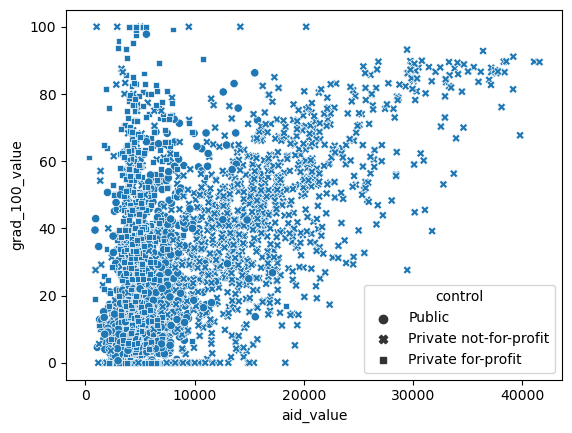

In [51]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', style='control')

A bit difficult to read but private for-profit (squares) don't seem to give out that much aid. Have much variability in graduation rates.

Private for-profit insitutions give out a much more broad range of aid - as aid increases, graduation rate increases.

Public schools (circles) give out a less broad of a range than private not-for-profit of aid and less aid in general, but they seem to see the same trend of increasing aid increases graduation rates. The next bit of code just looks at these two schools (public and private not-for-profit)

In [60]:
# df.loc[df['control']=='Public']

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

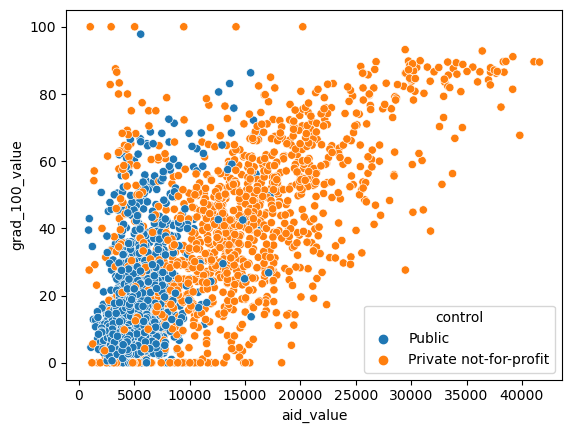

In [61]:
sns.scatterplot(data=df.loc[(df['control']=='Public') | (df['control']=='Private not-for-profit')], x='aid_value', y='grad_100_value', hue='control')

Relationship (between aid value and graduation rate) is more gradual for private not-for-profit and steep for public?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

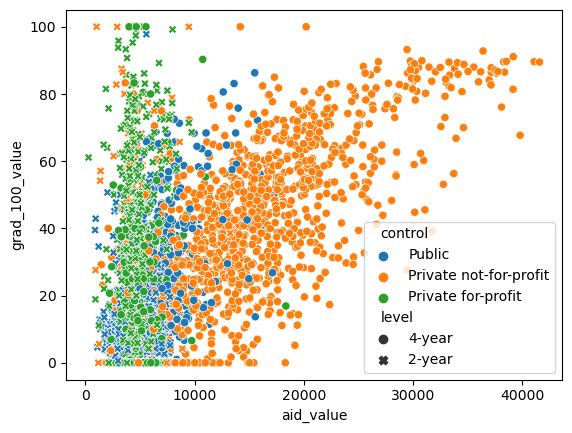

In [64]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control', style='level')

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.